In [4]:
# f(x) = (x + index_num) % 8
# 452648 % 8 = 0
# f(x) = (x + 1) % 8
# 0 -> 1     000 -> 001
# 1 -> 2     001 -> 010
# 2 -> 3     010 -> 011
# 3 -> 4     011 -> 100
# 4 -> 5     100 -> 101
# 5 -> 6     101 -> 110
# 6 -> 7     110 -> 111
# 7 -> 0     111 -> 000

In [5]:
from qiskit import QuantumCircuit
from qiskit import Aer
from qiskit import assemble

simulator = Aer.get_backend('qasm_simulator')

{'001': 1}
{'010': 1}
{'011': 1}
{'100': 1}
{'101': 1}
{'110': 1}
{'111': 1}
{'000': 1}


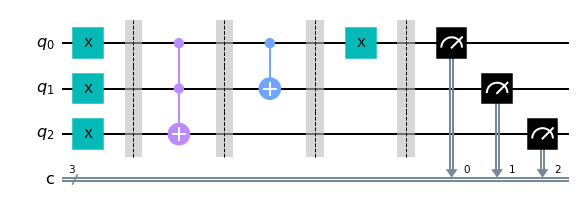

In [6]:
def uf_fun(circ, x):
    if (x == 1):
        circ.x(0)
        circ.barrier()
    if (x == 2):
        circ.x(1)
        circ.barrier()
    if (x == 3):
        circ.x(0)
        circ.x(1)
        circ.barrier()
    if (x == 4):
        circ.x(2)
        circ.barrier()
    if (x == 5):
        circ.x(2)
        circ.x(0)
        circ.barrier()
    if (x == 6):
        circ.x(2)
        circ.x(1)
        circ.barrier()
    if (x == 7):
        circ.x(2)
        circ.x(1)
        circ.x(0)
        circ.barrier()
        
    circ.ccx(0, 1, 2)
    circ.barrier()
    
    circ.cx(0, 1)
    circ.barrier()
    
    circ.x(0)
    circ.barrier()
    
    circ.measure(0, 0) # pomiar qubit 0 na bit 0
    circ.measure(1, 1) # pomiar qubit 1 na bit 1
    circ.measure(2, 2) # pomiar qubit 1 na bit 1


for i in range(8):
    circ = QuantumCircuit(3, 3)
    uf_fun(circ, i)
    
    qobj = assemble(circ, shots=1)
    results = simulator.run(qobj)

    hist = results.result().get_counts()
    # print(format(i, "b"))
    print(hist)
    
circ.draw(output="mpl")
